0.09968600344297315


<BarContainer object of 10 artists>

<Figure size 432x288 with 0 Axes>

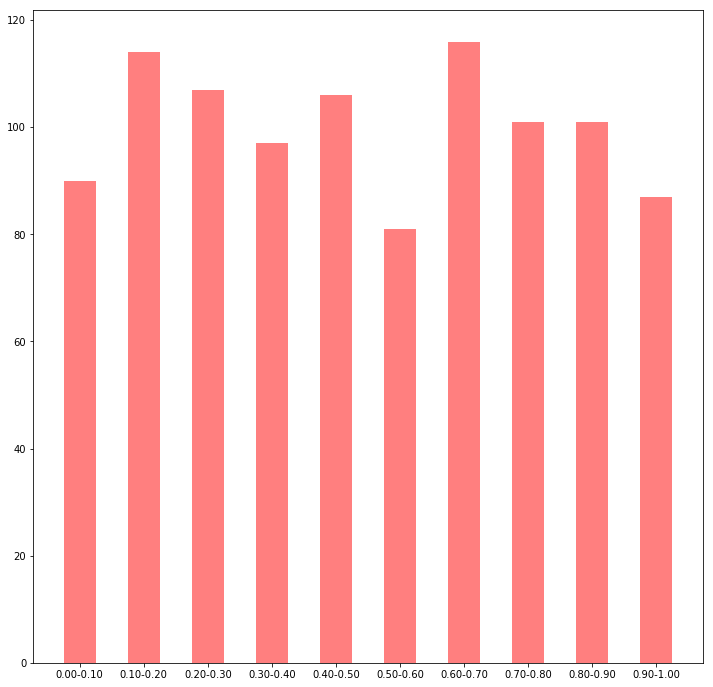

In [15]:
import  matplotlib.pyplot as plt
import numpy as np
#一开始理解错题目 只可视化了n维数据中的一维
def histogram(data,bins,dim=None):
    data = data if dim == None else data[dim]
    data_max, data_min = max(data),min(data)
    #确定宽度
    width = (data_max - data_min)/bins
    N = np.arange(bins)
    bin_start = [data_min + i * width for i in N]
    bin_freq = np.array([0*i for i in N])
    print(width)
    #确定频率
    for e in data:
        if e != data_max:
            bin_freq[int((e-data_min)//width)] = bin_freq[int((e-data_min)//width)] + 1
        else: bin_freq[-1] =bin_freq[-1]+1
            #对最大值的特殊处理
    #返回
    return width,bin_start,bin_freq

#创建随机数
n = 1000
data = np.array([np.random.rand(n),
                np.random.rand(n),
                np.random.rand(n)])
width,bin_start,bin_freq = histogram(data,10,1)
plt.figure()
f,ax=plt.subplots(figsize=(12,12))
#ax是操作子图操作，plt由figure设置大小 但是插入子图会改变 所以子图设置大小
x_pos = np.arange(10)
x_label = ["%0.2f"%i + "-" +"%0.2f"%(i+width) for i in bin_start]
plt.bar(x_label,bin_freq,width=width*5,color='r',alpha=0.5)


In [2]:
import numpy as np
#正确理解应该是计数
def power(N,dim):
    result = 1
    for i in range(dim):
        result = result * N
    return result

def histogram_count(data,bins,dim=None):
    #确定需要多少个位置保存频率
    N = 1
    N = power(bins,dim)
    record = np.zeros(N)
    data_max = []
    data_min = []
    width = []
    for i in range(dim): 
        data_max.append(max(data[i]))
        data_min.append(min(data[i]))
        width.append((data_max[i] - data_min[i])/bins)
    pos = []
    #数值每一维的保存位置
    for i in range(len(data[0])):
        temp = []
        for j in range(dim):
            if data[j][i] != data_max[j]:
                temp.append(int((data[j][i]-data_min[j])//width[j]))
            else:temp.append(bins-1)
        pos.append(temp)
    #确定每个数据的位置
    for i in range(len(data[0])):
        current_pos = 0
        for j in range(dim):
            current_pos = current_pos + power(bins,dim-j-1) * pos[i][j]
        record[current_pos] = record[current_pos] + 1
    return record
n = 1000
data = np.array([np.random.rand(n),
                np.random.rand(n),
                np.random.rand(n)])

bin_result = histogram_count(data,10,3)
print(bin_result)

[3. 1. 0. 0. 1. 0. 1. 1. 0. 2. 2. 5. 0. 0. 1. 0. 1. 1. 0. 0. 1. 2. 2. 1.
 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3. 2. 3. 0. 3. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 2. 0. 0. 2. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 2. 0. 1. 1. 0. 3. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 3. 2. 0. 1. 1.
 2. 4. 1. 0. 0. 0. 0. 1. 0. 0. 1. 2. 1. 1. 2. 0. 2. 2. 2. 1. 0. 1. 0. 0.
 0. 0. 3. 2. 1. 1. 0. 1. 0. 0. 0. 0. 0. 2. 3. 1. 0. 2. 0. 2. 1. 1. 0. 1.
 3. 1. 0. 1. 1. 2. 1. 4. 1. 1. 1. 1. 2. 0. 0. 2. 2. 2. 1. 0. 2. 0. 1. 1.
 2. 5. 0. 1. 2. 0. 1. 0. 0. 1. 0. 1. 0. 2. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 2. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 2. 1. 2. 0. 0. 2. 1. 1. 3.
 1. 0. 0. 2. 1. 1. 1. 1. 0. 1. 0. 1. 3. 2. 1. 1. 1. 2. 0. 2. 0. 2. 0. 1.
 1. 1. 1. 2. 2. 2. 0. 0. 1. 0. 0. 2. 1. 0. 0. 1. 0. 0. 0. 4. 0. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 1. 3. 1. 0. 0. 0. 2. 0. 1. 0. 1. 2. 0. 1. 1. 0. 2.
 2. 1. 0. 0. 2. 2. 2. 0. 1. 4. 0. 0. 0. 1. 1. 0. 0. 2. 4. 3. 1. 3. 2. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.